In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree

In [2]:
from missingno import missingno
import missingno as msn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


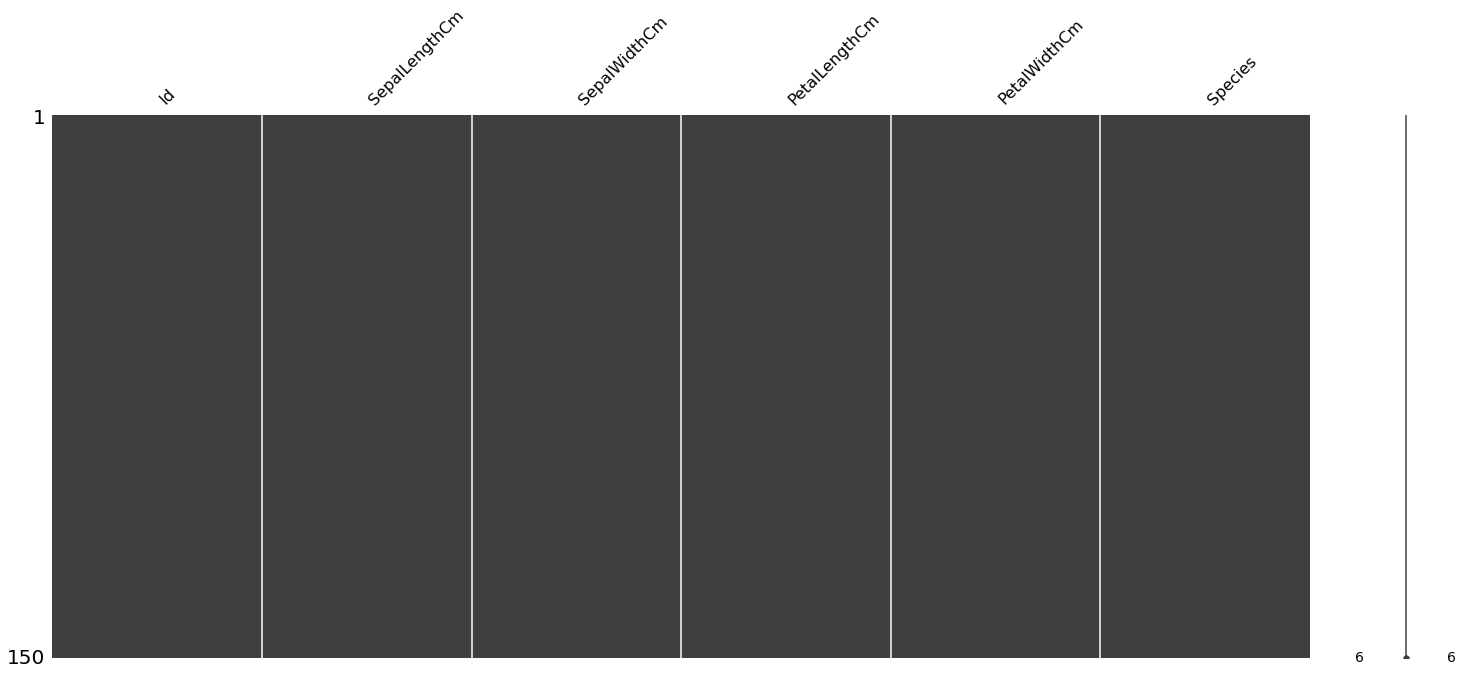

In [6]:
msn.matrix(data)

Since we dont have missing values in our data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
# data['Species']=data['Species'].map({"Iris-versicolor":0,"Iris-virginica":1,"Iris-setosa":2})

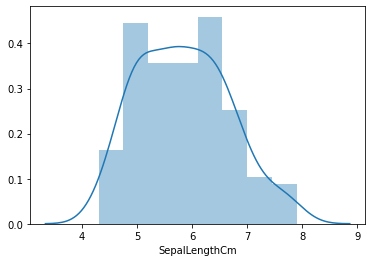

In [10]:
sns.distplot(data.SepalLengthCm)
plt.show()

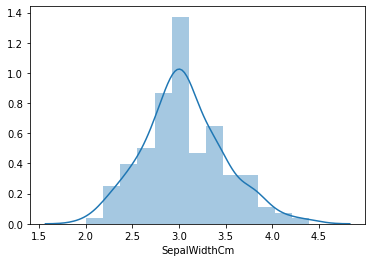

In [11]:
sns.distplot(data.SepalWidthCm)
plt.show()

## Dropping Unnecesary columns

In [12]:
data.drop(["Id"],axis = 1,inplace = True)

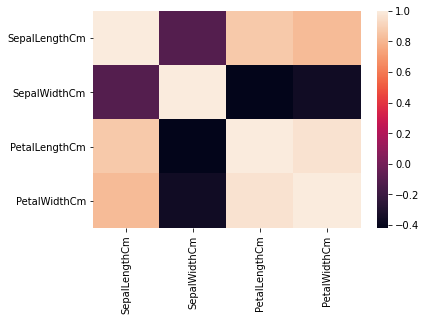

In [13]:
sns.heatmap(data.corr())
plt.show()

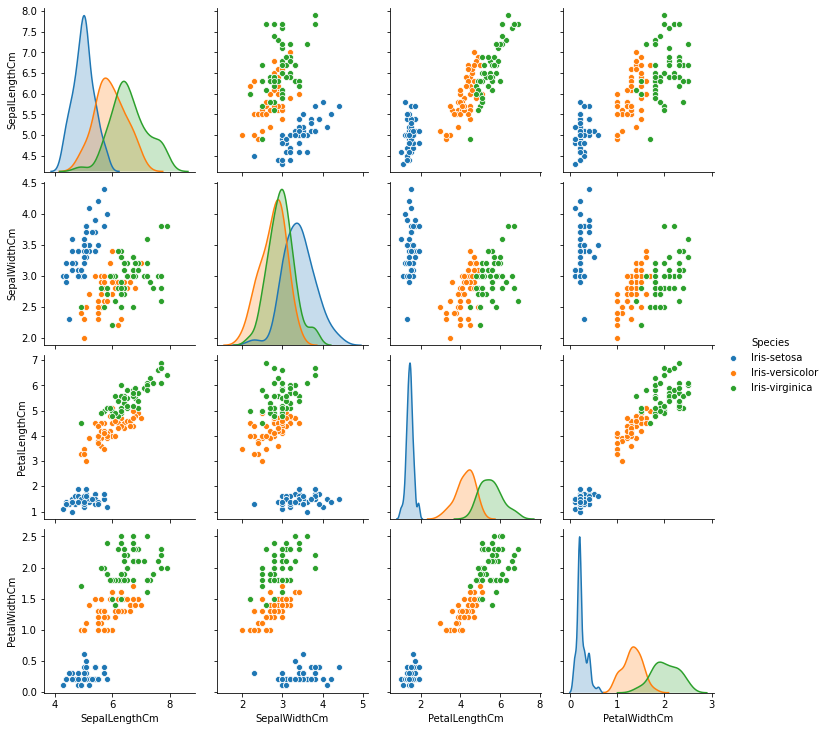

In [14]:
sns.pairplot(data, hue = 'Species')

In [15]:
target = data['Species']
df1 = data.copy()
df1 = df1.drop('Species', axis =1)
df1.shape

(150, 4)

In [16]:
# Defining the attributes and labels

X = data.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

y = data['Species'].values  #Labels

print("The shape of the data is-", data.shape)

The shape of the data is- (150, 5)


In [17]:

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split - ", X_train.shape)
print("Testing split - ", X_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [18]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

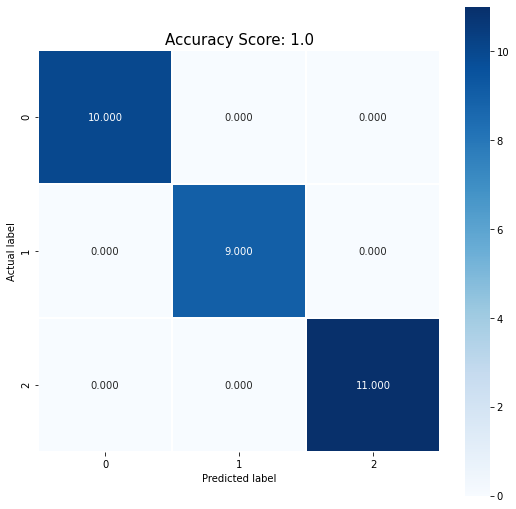

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [21]:
target.dtype

dtype('O')

In [22]:
type(df1)

pandas.core.frame.DataFrame

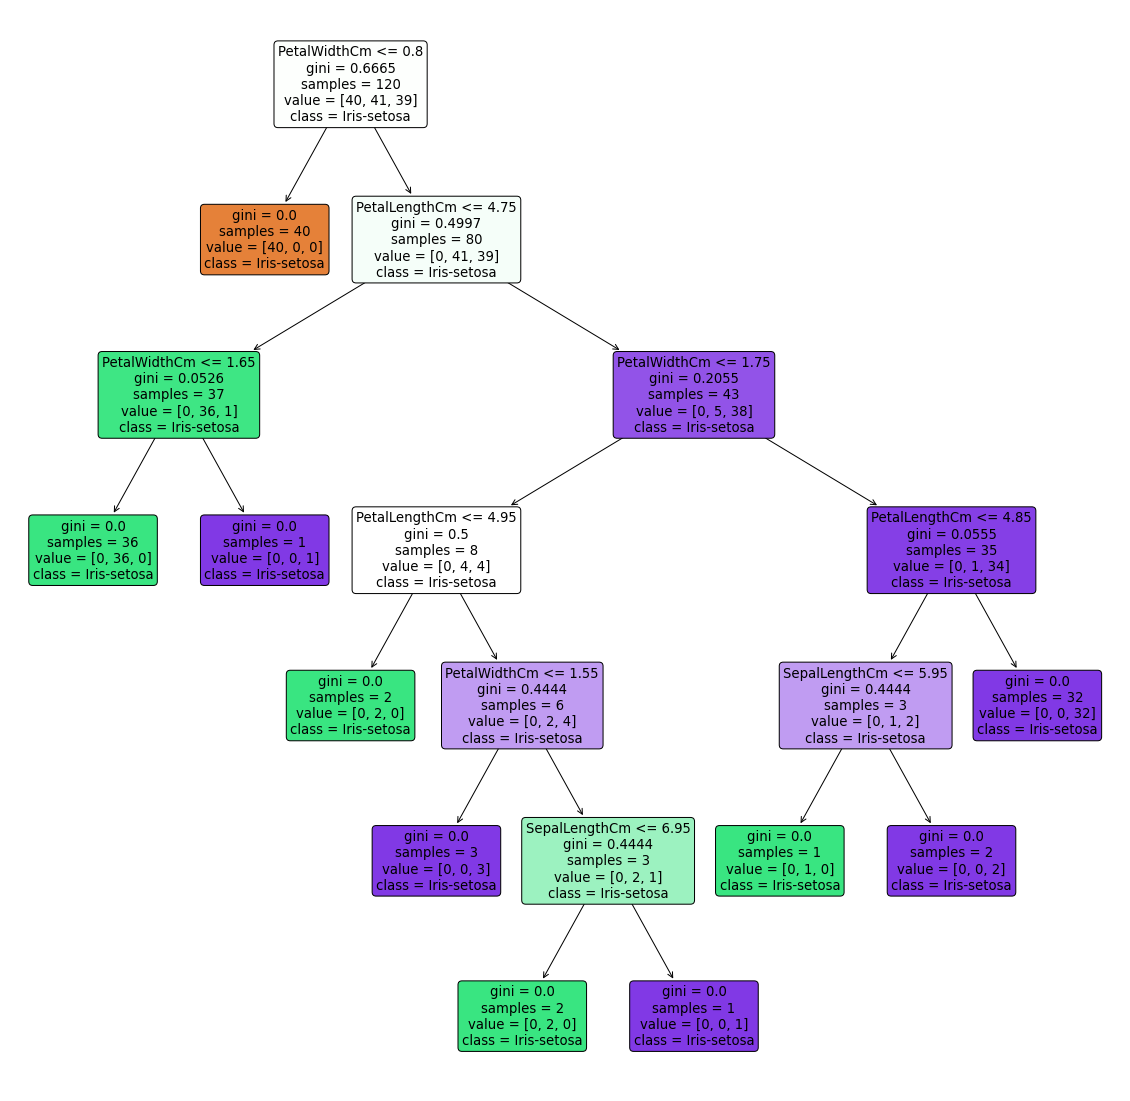

In [24]:
# Visualising the graph
plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);